In [1]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
import pandas as pd
import numpy as np
import platform
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

Unknown system...  sorry~~~


In [ ]:
df = pd.read_csv('./서울시 착한가격음식점(종합).csv',encoding='cp949',index_col=0)
df.columns

Index(['업소아이디', '업소명', '분류코드', '분류코드명', '업소 주소', '업소 전화번호', '찾아오시는 길', '업소정보',
       '자랑거리', '추천수', '기준년월', '업소 사진', '위도', '경도', '행정구', '행정동', '검색명',
       '식당아이디', '별점', '메뉴', '가격', '리뷰', '총개수', '키워드1', '개수1', '키워드2', '개수2',
       '키워드3', '개수3', '키워드4', '개수4', '키워드5', '개수5'],
      dtype='object')

Text(0.5, 1.0, '자치구별 착한가격 업소 분포현황')

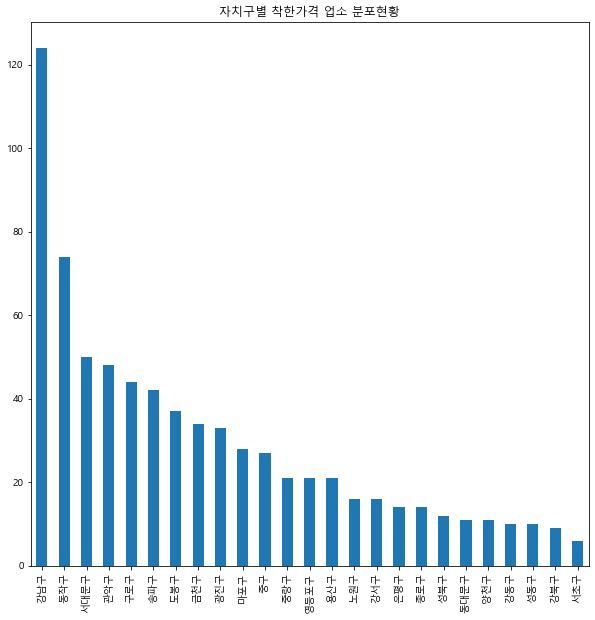

In [ ]:
df_gu = df['행정구'].value_counts()
df_gu.plot(kind='bar',figsize=(10,10),legend=False)
plt.title('자치구별 착한가격 업소 분포현황')

In [ ]:
df2 = df[['행정구','행정동','업소명']]
df2.head()

,행정구,행정동,업소명
0,관악구,남현동,목우촌부추삼겹살
1,관악구,봉천동,청진동해장국
2,송파구,석촌동,오백냥분식
3,관악구,신림동,토방 닭 한마리
4,강서구,등촌동,왕세숫대야냉면(행복을파는집)


C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


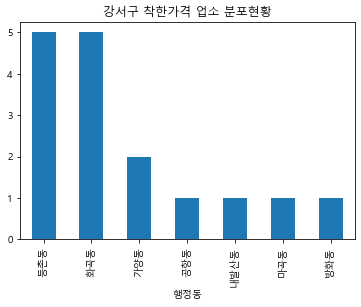

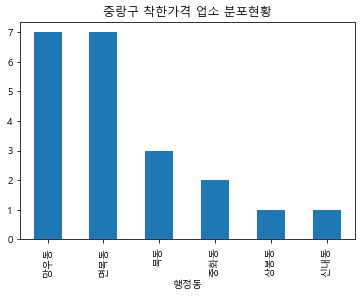

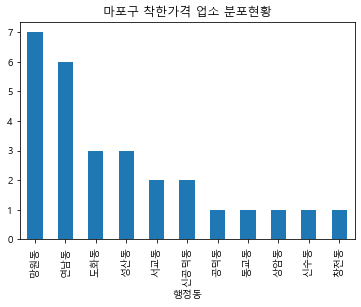

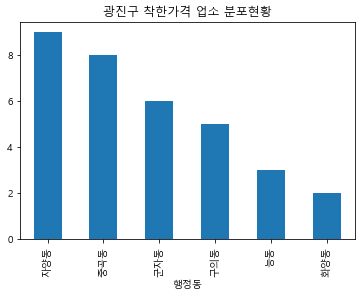

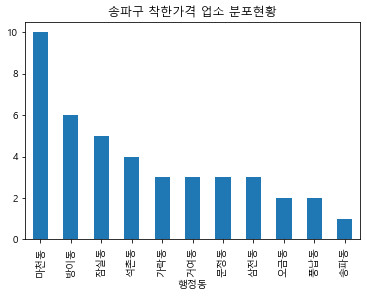

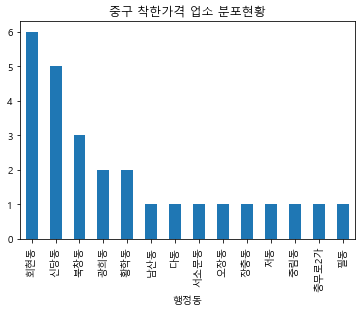

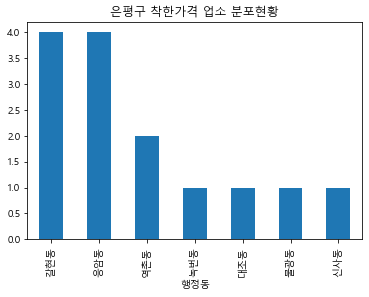

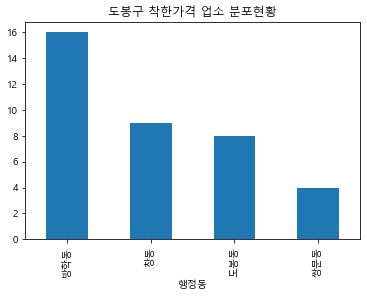

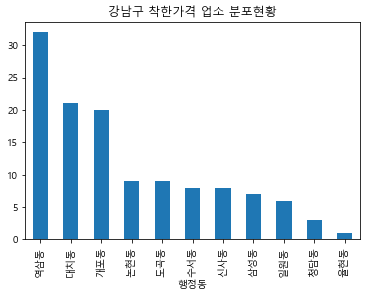

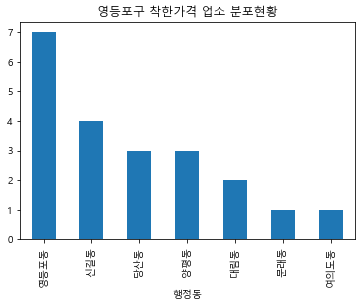

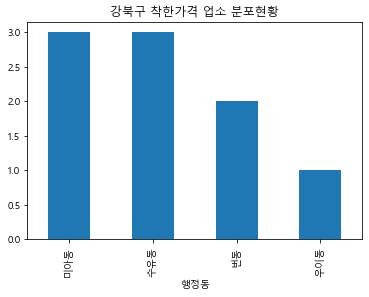

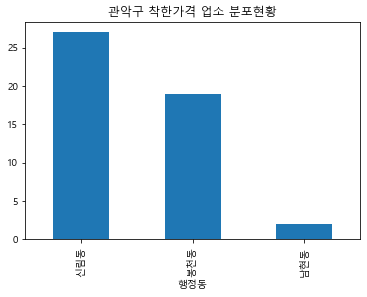

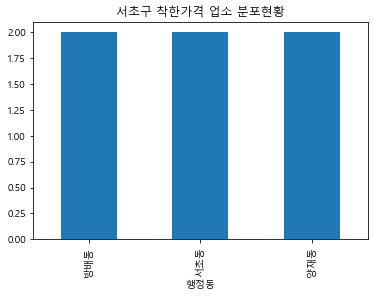

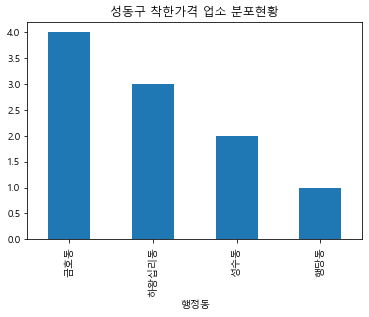

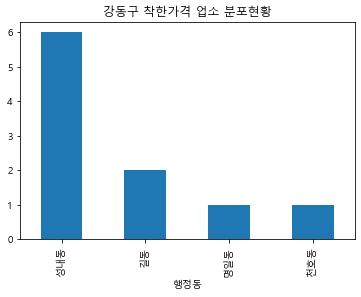

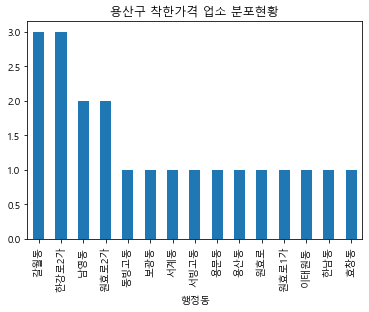

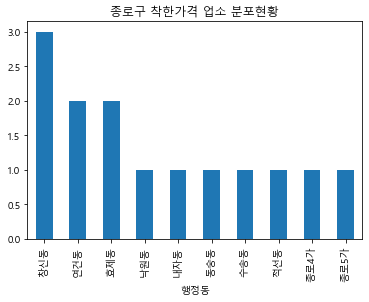

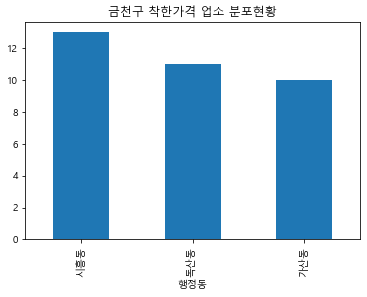

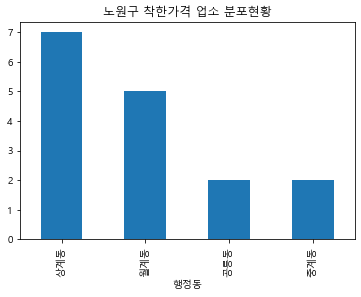

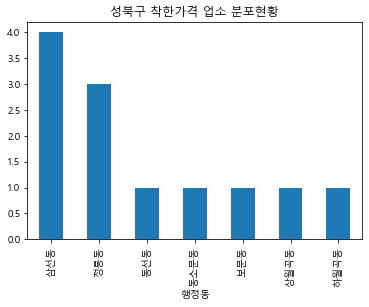

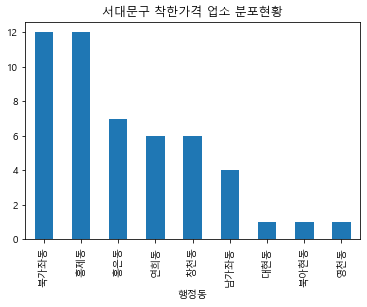

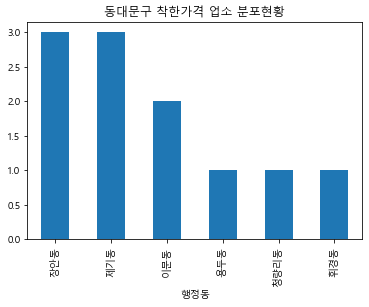

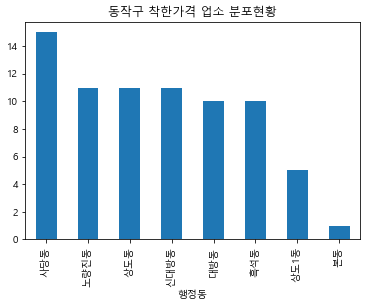

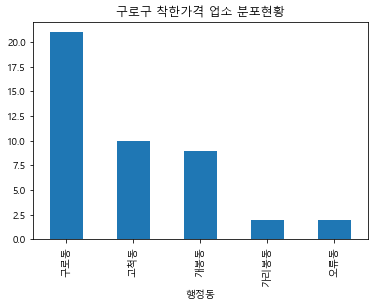

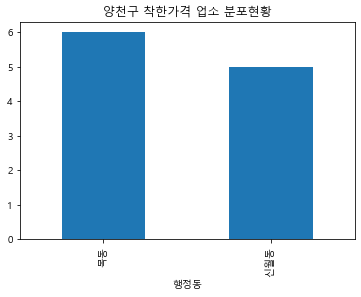

In [ ]:
gu_list = list(set(df2['행정구']))
for gu in gu_list :
    gu_df = df2[df2['행정구'] == gu]
    gu_bar = pd.pivot_table(gu_df[['행정동','업소명']],
            index=['행정동'],
            aggfunc='count').sort_values('업소명',ascending=False)
    gu_bar.plot(kind='bar',legend=False)
    plt.title(gu + ' 착한가격 업소 분포현황')

### 단계구분도

In [ ]:
import folium
import json

In [ ]:
mapDf.head()

,행정구
강남구,124
동작구,74
서대문구,50
관악구,48
구로구,44


In [ ]:
geo_path='./02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

map=folium.Map(location=[37.5502,126.982],
               zoom_start=11,
               tiles='Stamen Toner')

In [ ]:
mapp = pd.read_csv('./mapdata_gu.csv',index_col=0)
mapp.rename(columns = {'Unnamed: 0':'행정구',
                      '행정구':'착한가격업소'},inplace=True)
mapp.head()

,착한가격업소
강남구,124
동작구,74
서대문구,50
관악구,48
구로구,44


In [ ]:
map.choropleth(geo_data=geo_str,
               data=mapp,
               columns=[mapp.index,'착한가격업소'],
               key_on = 'feature.id',
               fill_color='PuRd',
               legend_name='자치구별 착한가격업소 현황')
folium.LayerControl().add_to(map)
map

C:\Users\Administrator\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
